In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
#import warnings
#warnings.filterwarnings('ignore')

#DT 시각화를 위해 dt_clf 생성
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [9]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot (graphvize가 읽어드릴 수 있는) 파일을 생성함.
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names,\
    feature_names = iris_data.feature_names, impurity=True, filled=True)

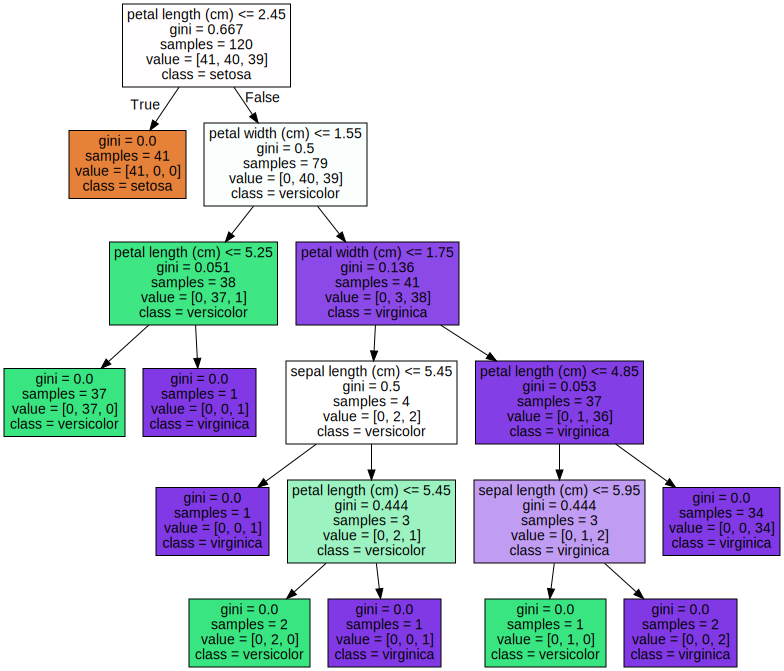

In [10]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


feature importance 시각화

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

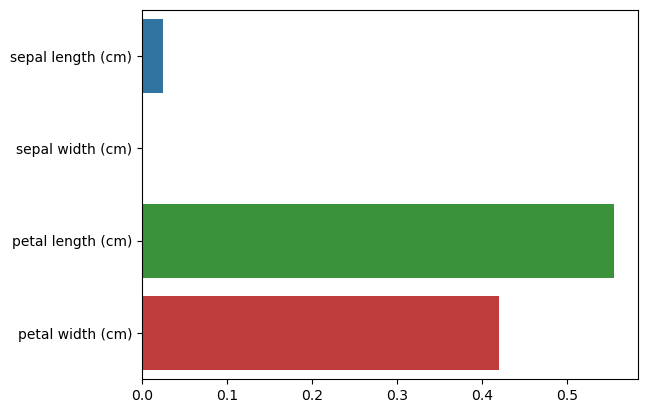

In [13]:
import seaborn as sns
import numpy as np

#feature importance 추출
print('Feature importances:\n{}'.format(np.round(dt_clf.feature_importances_,3)))

for name , value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{} : {:.3f}'.format(name,value))

# feaute importance를 칼럼별 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

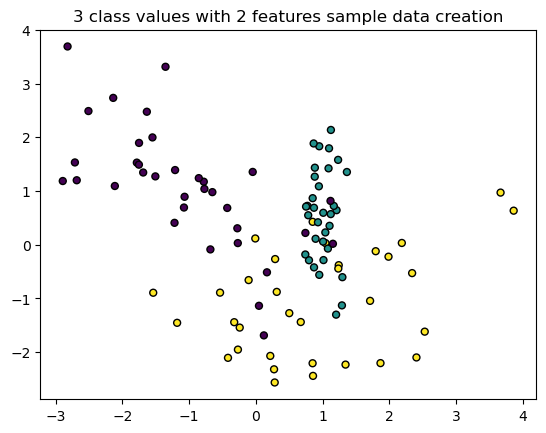

In [16]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title('3 class values with 2 features sample data creation')

#make_classification함수를 통한 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [68]:
import numpy as np
#  Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig , ax = plt.subplots()
    
    #학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim = (y.min(),y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_red = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    model.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(xlim_start,ylim_end,num=200), 
                         np.linspace(ylim_start,ylim_end,num=200))
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    #ax.scatter(xx,yy,c=Z,s=25)
    
    #contourf() 를 이용하여 class boundary를 visualization
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx,yy, Z , alpha=0.3,
                           levels = np.arange(n_classes+1)-0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder = 1)
    
    
    

/var/folders/d5/28cm20750499kzvbcrh0z1g00000gn/T/ipykernel_60148/666520904.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx,yy, Z , alpha=0.3,


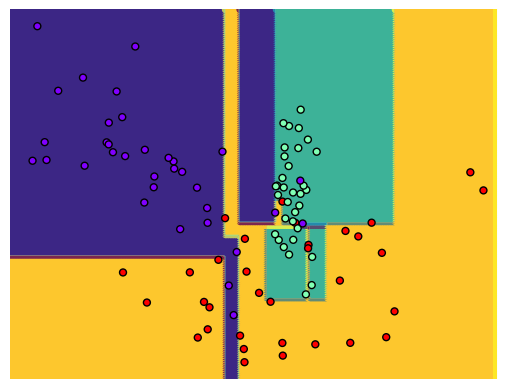

In [69]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

